# kinza Nisar

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Import Dataset
df = pd.read_csv('./wine.data.csv')
df= pd.DataFrame(df)
df.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Removing Response variable
 As PCA works in an unsupervised learning setup, therefore we will remove the dependent i.e. response variable from our dataset.  Note that PCA only works on numeric variables, and that is why we create dummy variables for categorical variables.

In [4]:
df2= df.drop(["Class"],axis=1)
df2.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Scaling Features
We will have to first scale the dataset to perform PCA in Python.

In [5]:
scale = StandardScaler()
scaled_data = scale.fit_transform(df2)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Sine the above output is in Arrays, we'll change it into a Pandas DataFrame

In [6]:
scaled_data = pd.DataFrame(scaled_data,columns=df2.columns)
scaled_data.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### Splitting the dataset into train and test

PCA should not be made to run on the entire dataset. As this would cause the dataset to leak thus causing overfitting. Also, we should not perform PCA on train and test separately as the level of variance will be different in both these datasets which will the cause the final vectors of these two datasets to have different directions. We first divide the dataset into train and test and perform PCA on train dataset and transform the test dataset using that PCA model (which was fitted on the train dataset).

In [7]:
# Target Variable
Y = df['Class']
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123)
print("No of Obs in Original DataFrame", df.shape)
print("No of Obs in Training Set", X_train.shape, "\n","No of Obs in test Set", X_test.shape)

No of Obs in Original DataFrame (178, 14)
No of Obs in Training Set (124, 13) 
 No of Obs in test Set (54, 13)


Initialize and Fit PCA
We first initialize PCA for having 13 components (for 13 continuous variables in the dataset) 
and then we fit this model on the scaled features.

In [8]:
pca = PCA(n_components=13)
pca_model = pca.fit(X_train)
print(pca_model)

PCA(n_components=13)


Generate PCA Loadings

We use transform command which transforms the scaled data to PCA loadings for each observation.

In [9]:
pca_train = pca_model.transform(X_train)
pca_train

array([[-3.43963601, -1.26177984,  0.675678  , ...,  0.13471844,
        -0.05088804,  0.03989125],
       [ 0.40561983,  1.25159405,  1.63964517, ..., -0.20118913,
        -0.16250314, -0.0071907 ],
       [ 0.54419099,  1.96275405, -0.64354362, ...,  0.18026253,
         0.12976963, -0.4001371 ],
       ...,
       [-1.70030423,  2.17405108,  1.74862221, ..., -0.44151719,
        -0.05108815, -0.09592594],
       [ 0.32680882,  1.16296504, -0.89531764, ..., -0.0768546 ,
        -0.62853741, -0.62292548],
       [-1.23486164,  1.46908186, -2.02116034, ..., -0.07115479,
        -0.16535875,  0.12670943]])

Generate Loading Matrix

We now generate the principal components loading matrix 
by using the attribute components_ of the pca command for each variable.

In [10]:
variable_Names= df2.columns
Matrix = pd.DataFrame(pca_model.components_,columns=variable_Names)
Matrix1 = np.transpose(Matrix)
Matrix1

,0,1,2,3,4,5,6,7,8,9,10,11,12
Alcohol,-0.177433,-0.464173,0.206386,-0.116647,-0.117718,-0.227732,-0.089016,-0.341232,0.472812,0.151824,-0.329549,-0.374967,0.104750
Malic acid,0.217361,-0.282420,-0.095505,-0.411162,0.419985,-0.390576,0.408488,-0.023771,0.068420,-0.388457,0.142627,0.143033,-0.045517
Ash,-0.063818,-0.344770,-0.612943,0.157035,-0.140690,-0.232754,-0.111379,0.119660,-0.449763,-0.100350,-0.371396,-0.066771,0.145803
Alcalinity of ash,0.213164,-0.033184,-0.622601,0.030989,0.033800,0.114578,-0.342750,-0.315687,0.409371,0.092183,0.374182,0.069764,-0.111799
Magnesium,-0.160022,-0.286957,-0.062121,0.660230,0.373803,0.140300,0.363497,0.250144,0.264395,0.137927,0.020500,0.020481,-0.091668
Total phenols,-0.420899,-0.015138,-0.104778,-0.253723,-0.008152,0.040406,-0.186098,0.568792,0.266508,-0.150392,0.282354,-0.103269,0.450969
Flavanoids,-0.410848,0.043418,-0.108710,-0.181991,-0.017666,-0.017629,-0.075904,0.166204,0.009184,-0.128932,-0.034359,-0.220946,-0.826842
Nonflavanoid phenols,0.287540,-0.098299,-0.151456,-0.166134,-0.621737,0.039430,0.504568,0.291170,0.146304,0.293645,0.091436,-0.063878,-0.097800
Proanthocyanins,-0.302657,-0.011797,-0.222446,-0.277176,0.115996,0.626356,0.393307,-0.363763,-0.165577,-0.015659,-0.057598,-0.175965,0.164979
Color intensity,0.017417,-0.498704,0.173515,-0.113612,-0.176756,0.422179,-0.210532,0.083881,0.057080,-0.201877,-0.153786,0.603324,-0.124400


#### Inference :
This Loading Matrix is like a correlation matrix. 
The variable having the highest correlation with the columns will be the first principal component
 Heading in the output should be PC1, PC2 and so on. Will be renaming them in the upcoming steps

#### Variance explained by each Principal Component

We took the number of components for PCA equal to the number of variables in our dataset 
which is 13 in our case 
we will figure out the optimum value of the number of components to run PCA 
i.e. reduce the number of components to be considered for the modeling algorithms 
thus in a way reducing the number of features
In order to decide the number of Principal Components, 
we analyze the proportion of variance explained by each component
We use the explained_variance function for computing variance explained by each Principal Component.

In [11]:
pca_model.explained_variance_

array([4.5323792 , 2.74497025, 1.25896725, 0.98375395, 0.78706023,
       0.56893736, 0.48128553, 0.34642303, 0.30256294, 0.28997532,
       0.1993837 , 0.1460664 , 0.08993754])

Ratio of Variance explained by each component

We can now look at the proportion of variance explained by each PC.

In [12]:
var = pca_model.explained_variance_ratio_
var

array([0.3559916 , 0.21560119, 0.09888444, 0.07726806, 0.06181893,
       0.04468667, 0.03780213, 0.02720948, 0.02376453, 0.02277585,
       0.01566041, 0.01147265, 0.00706406])

#### Inference : 
From the output we find that PC1 explains 35.59% of the variance, 
PC2 explains 0.21% and so on. 
We find that the first 7 components explain approximately 90% of the variance 
(0.3559916 + 0.21560119 + 0.09888444 + 0.07726806 + 0.06181893 + 0.04468667 + 0.03780213)

##### PCA CHART

In the above step, we got the proportion of variance explained by each component 
which we need to decide the number of components. 
We calculated that the first seven components explain most of the variance, 
however, we plot the explained variance on a line graph. 
Here we plot the ratio of variance explained by each component using a line graph. 
This PCA chart helps us to decide the number of principal components to be taken for the modeling algorithm.

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

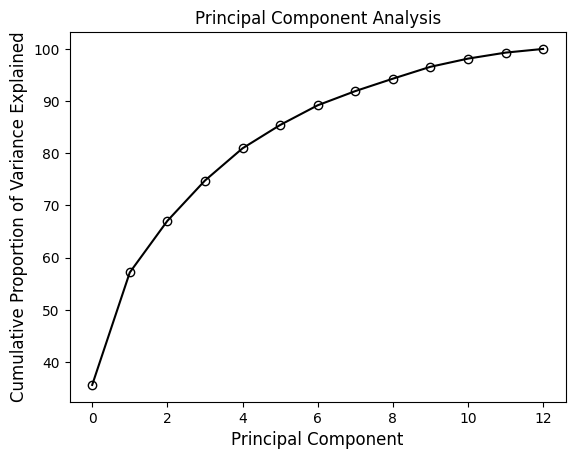

In [13]:
cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)


Renaming Columns

We will rename the columns of the loading matrix that was generated for each observation using PCA. 
After renaming, we will select 7 principal components 
and make a data frame with the dependent variable and the 7 PCs.

In [14]:
pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 14)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,-3.439636,-1.261780,0.675678,-0.458577,-0.402586,-0.025048,-0.033965,1.501872,0.123831,-0.052454,0.134718,-0.050888,0.039891
1,0.405620,1.251594,1.639645,0.795527,-0.765111,-0.831722,-0.586210,-0.382102,1.302777,-0.134690,-0.201189,-0.162503,-0.007191
2,0.544191,1.962754,-0.643544,-1.038570,0.363450,-0.262810,-0.531391,0.784083,0.186477,0.557106,0.180263,0.129770,-0.400137
3,-1.604997,2.138501,-0.179905,-0.592744,0.107562,0.722932,-1.171131,0.703425,0.537343,-1.093969,-0.125849,0.004538,0.306018
4,-2.019311,-1.509250,-0.021326,1.127490,-0.075501,-1.502803,0.190036,0.075976,0.139849,0.784756,0.010603,0.418701,0.023822


Concatenate Dependent variable and Principal Components

We now concatenate the dependent variable i.e. "MEDV" with principal components and 
Suppose take the first seven components for our analysis. 
First, we will reset the index for Y_train as we need to concatenate datasets to make one whole train dataset. 
Then we will remove the index variable from the dataset 
and make a subset of the dataset having 7 PCs and the dependent variable.

In [15]:
Y_train1 = Y_train.reset_index()
 
pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','Class']]
pca_train3.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,Class
0,-3.439636,-1.261780,0.675678,-0.458577,-0.402586,-0.025048,-0.033965,1
1,0.405620,1.251594,1.639645,0.795527,-0.765111,-0.831722,-0.586210,2
2,0.544191,1.962754,-0.643544,-1.038570,0.363450,-0.262810,-0.531391,2
3,-1.604997,2.138501,-0.179905,-0.592744,0.107562,0.722932,-1.171131,2
4,-2.019311,-1.509250,-0.021326,1.127490,-0.075501,-1.502803,0.190036,1


# The End